# Hyperparameter Tuning


In [1]:
import pandas as pd
from data import load_data_selected_features
from pipelines_selected_features import pipeline

train_data, additional_train_data, test_data = load_data_selected_features()
all_train_data = pipeline.fit_transform(pd.concat([train_data, additional_train_data]))

# cut the data into train, additional train and test
train_data = all_train_data.loc[train_data.index]
additional_train_data = all_train_data.loc[additional_train_data.index]

X_train = train_data.drop(columns=['bg+1:00'])
y_train = train_data['bg+1:00']

X_additional_train = additional_train_data.drop(columns=['bg+1:00'])
y_additional_train = additional_train_data['bg+1:00']

### Tune LassoLarsICRegressor

22:58:00 - Start tuning LassoLarsIC
22:58:00 - Parameters: {'criterion': Categorical(categories=('aic', 'bic'), prior=None), 'eps': Real(low=1e-06, high=0.1, prior='log-uniform', transform='identity'), 'max_iter': Integer(low=1000, high=10000, prior='uniform', transform='identity'), 'noise_variance': Real(low=1e-06, high=0.01, prior='log-uniform', transform='identity'), 'positive': Categorical(categories=(True, False), prior=None)}
22:58:00 - Fitting the model
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitt

/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
23:00:41 - Best hyperparameters found.
23:00:41 - OrderedDict({'criterion': 'aic', 'eps': 0.03922948513965659, 'max_iter': 1944, 'noise_variance': 5.4116687755186035e-05, 'positive': False})
RMSE: 2.1119514958662755
R2 Score: 0.546965937588537


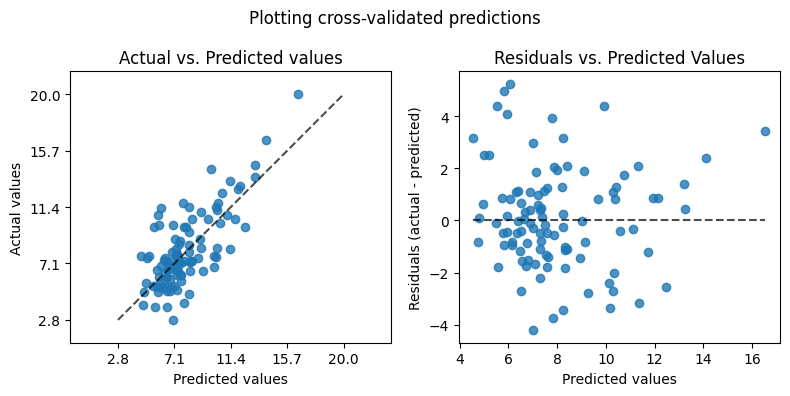

In [2]:
from sklearn.linear_model import LassoLarsIC
from skopt.space import Categorical, Real, Integer
from model_hyperparameter_tuning import tune_hyperparameters

search_space = {
    'criterion': Categorical(['aic', 'bic']),  # Criterion for model selection
    'eps': Real(1e-6, 1e-1, prior='log-uniform'),  # Length of the path (log-uniform for finer control)
    'max_iter': Integer(1000, 10000),  # Maximum number of iterations (larger range for better convergence)
    'noise_variance': Real(1e-6, 1e-2, prior='log-uniform'),  # Noise variance (log-uniform for finer control)
    'positive': Categorical([True, False]),  # Restrict coefficients to be positive or both positive and negative
}

model = LassoLarsIC()
best_estimator, best_params = tune_hyperparameters(model, search_space, X_train, y_train, X_additional_train, y_additional_train)


In [3]:
import os
import joblib

best_estimator_file_name = f'{model.__class__.__name__}.best_estimator.pkl'
joblib.dump(best_estimator, os.path.join('models', best_estimator_file_name))

['models/LassoLarsIC.best_estimator.pkl']